# Visualizing clusters

- After KMeans model training with an optimum K value (K = 15), in this final part of the exercise, you will visualize the clusters and their cluster centers (centroids) and see if they overlap with each other. For this, you'll first convert `rdd_split_int` RDD into spark DataFrame and then into Pandas DataFrame for plotting. Similarly, you'll convert `cluster_centers` into Pandas DataFrame. Once the DataFrames are created, you'll use matplotlib library to create scatter plots.

- Remember, you already have a SparkContext `sc`, `rdd_split_int` and `cluster_centers` variables available in your workspace.

## Instructions

- Convert `rdd_split_int` RDD into a Spark DataFrame.
- Convert Spark DataFrame into a Pandas DataFrame.
- Create a Pandas DataFrame from `cluster_centers` list.
- Create a scatter plot of the raw data and an overlaid scatter plot with centroids for `k = 15`.

In [1]:
# Intialization
import os
import sys

os.environ["SPARK_HOME"] = "/home/talentum/spark"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/bin/python3.6" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/bin/python3"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

# NOTE: Whichever package you want mention here.
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0 pyspark-shell' 
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.3 pyspark-shell'
# os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.6.0,org.apache.spark:spark-avro_2.11:2.4.0 pyspark-shell'

In [2]:
#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext

In [3]:
file_path = 'file:///home/talentum/test-jupyter/P2/M4/SM4/Dataset/5000_points.txt'

# Load the dataset into a RDD
clusterRDD = sc.textFile(file_path)

# Split the RDD based on tab
rdd_split = clusterRDD.map(lambda x: x.split('\t'))

# Transform the split RDD by creating a list of integers
rdd_split_int = rdd_split.map(lambda x: [int(x[0]), int(x[1])])

# Count the number of rows in RDD 
print("There are {} rows in the rdd_split_int dataset".format(rdd_split_int.count()))

There are 5000 rows in the rdd_split_int dataset


In [4]:
from pyspark.mllib.clustering import KMeans
from math import sqrt

def error(point):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))


# Train the model with clusters from 13 to 16 and compute WSSSE 
for clst in range(13, 17):
    model = KMeans.train(rdd_split_int, clst, seed=1)
    WSSSE = rdd_split_int.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("The cluster {} has Within Set Sum of Squared Error {}".format(clst, WSSSE))

# Train the model again with the best k 
model = KMeans.train(rdd_split_int, k=15, seed=1)

# Get cluster centers
cluster_centers = model.clusterCenters

The cluster 13 has Within Set Sum of Squared Error 249164132.49410182
The cluster 14 has Within Set Sum of Squared Error 209371154.24941802
The cluster 15 has Within Set Sum of Squared Error 169394691.52639425
The cluster 16 has Within Set Sum of Squared Error 202384225.6640126


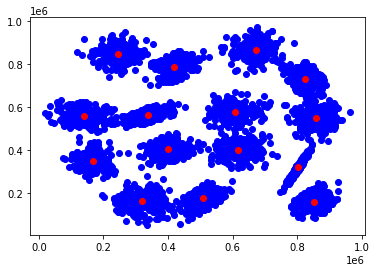

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert rdd_split_int RDD into Spark DataFrame
rdd_split_int_df = spark.createDataFrame(rdd_split_int, schema=["col1", "col2"])

# Convert Spark DataFrame into Pandas DataFrame
rdd_split_int_df_pandas = rdd_split_int_df.toPandas()

# Convert "cluster_centers" that you generated earlier into Pandas DataFrame
cluster_centers_pandas = pd.DataFrame(cluster_centers, columns=["col1", "col2"])

# Create an overlaid scatter plot
plt.scatter(rdd_split_int_df_pandas["col1"], rdd_split_int_df_pandas["col2"], color="blue", marker="o")
plt.scatter(cluster_centers_pandas["col1"], cluster_centers_pandas["col2"], color="red", marker="o")
plt.show()